### Kaggle - Flipkart Dataset

### Objective:
   This dataset containing specs of various Mobile brands in India has been scraped from an ecommerce website 'Flipkart'.The objective to predict the sales of the mobile based on the brand and model and various spec of mobile.

##### Import the libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Load the dataset:

In [6]:
mydata = pd.read_csv("Flipkart Mobile - 2.csv")
mydata.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

#### Null value:

In [9]:
mydata.isnull().sum()

brand               0
model               0
base_color          0
processor           0
screen_size         0
ROM                 0
RAM                 0
display_size        0
num_rear_camera     0
num_front_camera    0
battery_capacity    0
ratings             0
num_of_ratings      0
sales_price         0
discount_percent    0
sales               0
dtype: int64

##### Label Encoder:

In [11]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [16]:
mydata['brand'] = LE.fit_transform(mydata.brand)
mydata['model'] = LE.fit_transform(mydata.model)
mydata['base_color'] = LE.fit_transform(mydata.base_color)
#mydata['processor '] = LE.fit_transform(mydata.processor)
#mydata['screen_size '] = LE.fit_transform(mydata.screen_size )



In [17]:
mydata['processor'] = LE.fit_transform(mydata.processor)
mydata['screen_size'] = LE.fit_transform(mydata.screen_size)

In [18]:
mydata.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales,processor,screen_size
0,0,117,0,5,4,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52,5,4
1,0,114,8,0,2,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39,0,2
2,0,117,8,5,4,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52,5,4
3,0,118,6,6,1,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07,6,1
4,0,113,8,0,1,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15,0,1


#### Correlation:

In [20]:
mydata_corr = mydata.corr()
mydata_corr

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales,processor,screen_size
brand,1.000000,-0.248286,-0.148972,0.132482,-0.170389,-0.136110,0.165226,0.302827,0.179594,0.082684,0.317391,-0.471712,0.107817,-0.320671,0.108551,0.061640,0.132482,-0.170389
model,-0.248286,1.000000,0.130368,0.122789,0.275462,0.136181,-0.070618,-0.319216,-0.378151,0.154792,-0.412231,0.341180,0.000081,0.341178,-0.088713,0.075197,0.122789,0.275462
base_color,-0.148972,0.130368,1.000000,-0.001256,0.049771,0.071786,0.018976,-0.083042,-0.013668,0.040739,-0.134009,0.087344,-0.056475,0.086716,-0.087597,-0.034301,-0.001256,0.049771
processor,0.132482,0.122789,-0.001256,1.000000,0.069197,-0.106651,0.054517,0.086951,-0.079011,0.169497,-0.103624,0.045105,0.060215,-0.143971,-0.043283,0.131103,1.000000,0.069197
screen_size,-0.170389,0.275462,0.049771,0.069197,1.000000,0.081554,-0.161781,-0.713174,-0.491259,0.004159,-0.623638,0.286388,0.080528,0.379986,-0.103834,0.139414,0.069197,1.000000
ROM,-0.136110,0.136181,0.071786,-0.106651,0.081554,1.000000,0.673320,0.217014,0.199010,0.141389,-0.112008,0.029243,-0.243288,0.653686,-0.031086,-0.219048,-0.106651,0.081554
RAM,0.165226,-0.070618,0.018976,0.054517,-0.161781,0.673320,1.000000,0.509706,0.507055,0.210994,0.198515,-0.213065,-0.215292,0.339269,0.079932,-0.190557,0.054517,-0.161781
display_size,0.302827,-0.319216,-0.083042,0.086951,-0.713174,0.217014,0.509706,1.000000,0.576627,0.143606,0.662044,-0.393010,-0.140491,-0.039588,0.155390,-0.182469,0.086951,-0.713174
num_rear_camera,0.179594,-0.378151,-0.013668,-0.079011,-0.491259,0.199010,0.507055,0.576627,1.000000,0.051818,0.590979,-0.335873,-0.160858,-0.209523,0.142927,-0.160202,-0.079011,-0.491259
num_front_camera,0.082684,0.154792,0.040739,0.169497,0.004159,0.141389,0.210994,0.143606,0.051818,1.000000,-0.076471,-0.125024,0.048646,0.096949,-0.011453,0.081543,0.169497,0.004159


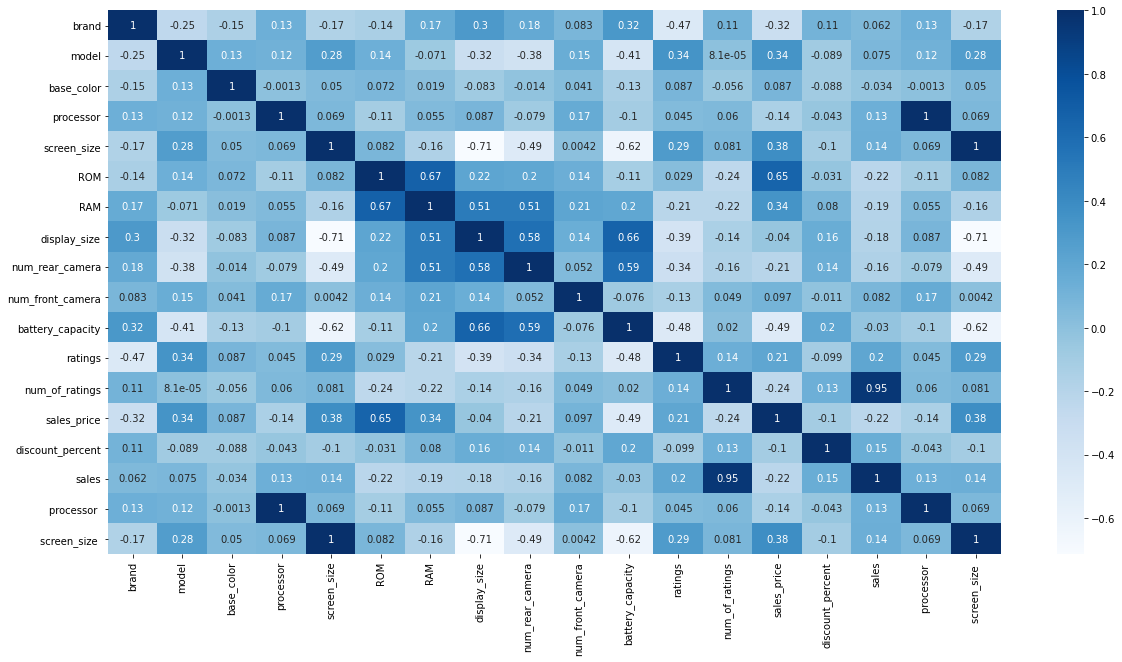

In [24]:
plt.figure(figsize = (20,10))
sns.heatmap(mydata_corr,annot = True, cmap = 'Blues')

In [35]:
mydata_new = mydata.iloc[:, :16]
mydata_new


,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,0,117,0,5,4,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,0,114,8,0,2,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,0,117,8,5,4,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,0,118,6,6,1,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,0,113,8,0,1,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,4,91,0,4,2,32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
426,4,91,8,4,2,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
427,4,76,6,4,0,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42
428,4,93,1,4,1,32,3,6.2,2,1,5000,4.2,8161,8299,0.07,6.77


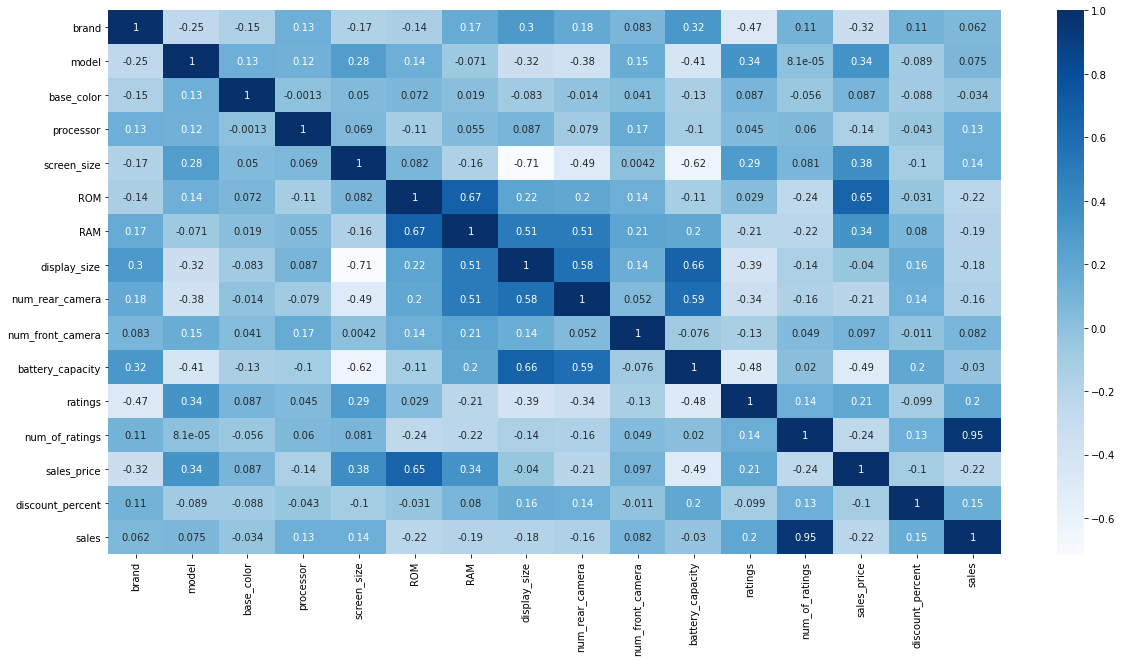

In [34]:
plt.figure(figsize = (20,10))
sns.heatmap(mydata_new.corr(),annot = True, cmap = 'Blues')

##### Pairplot:

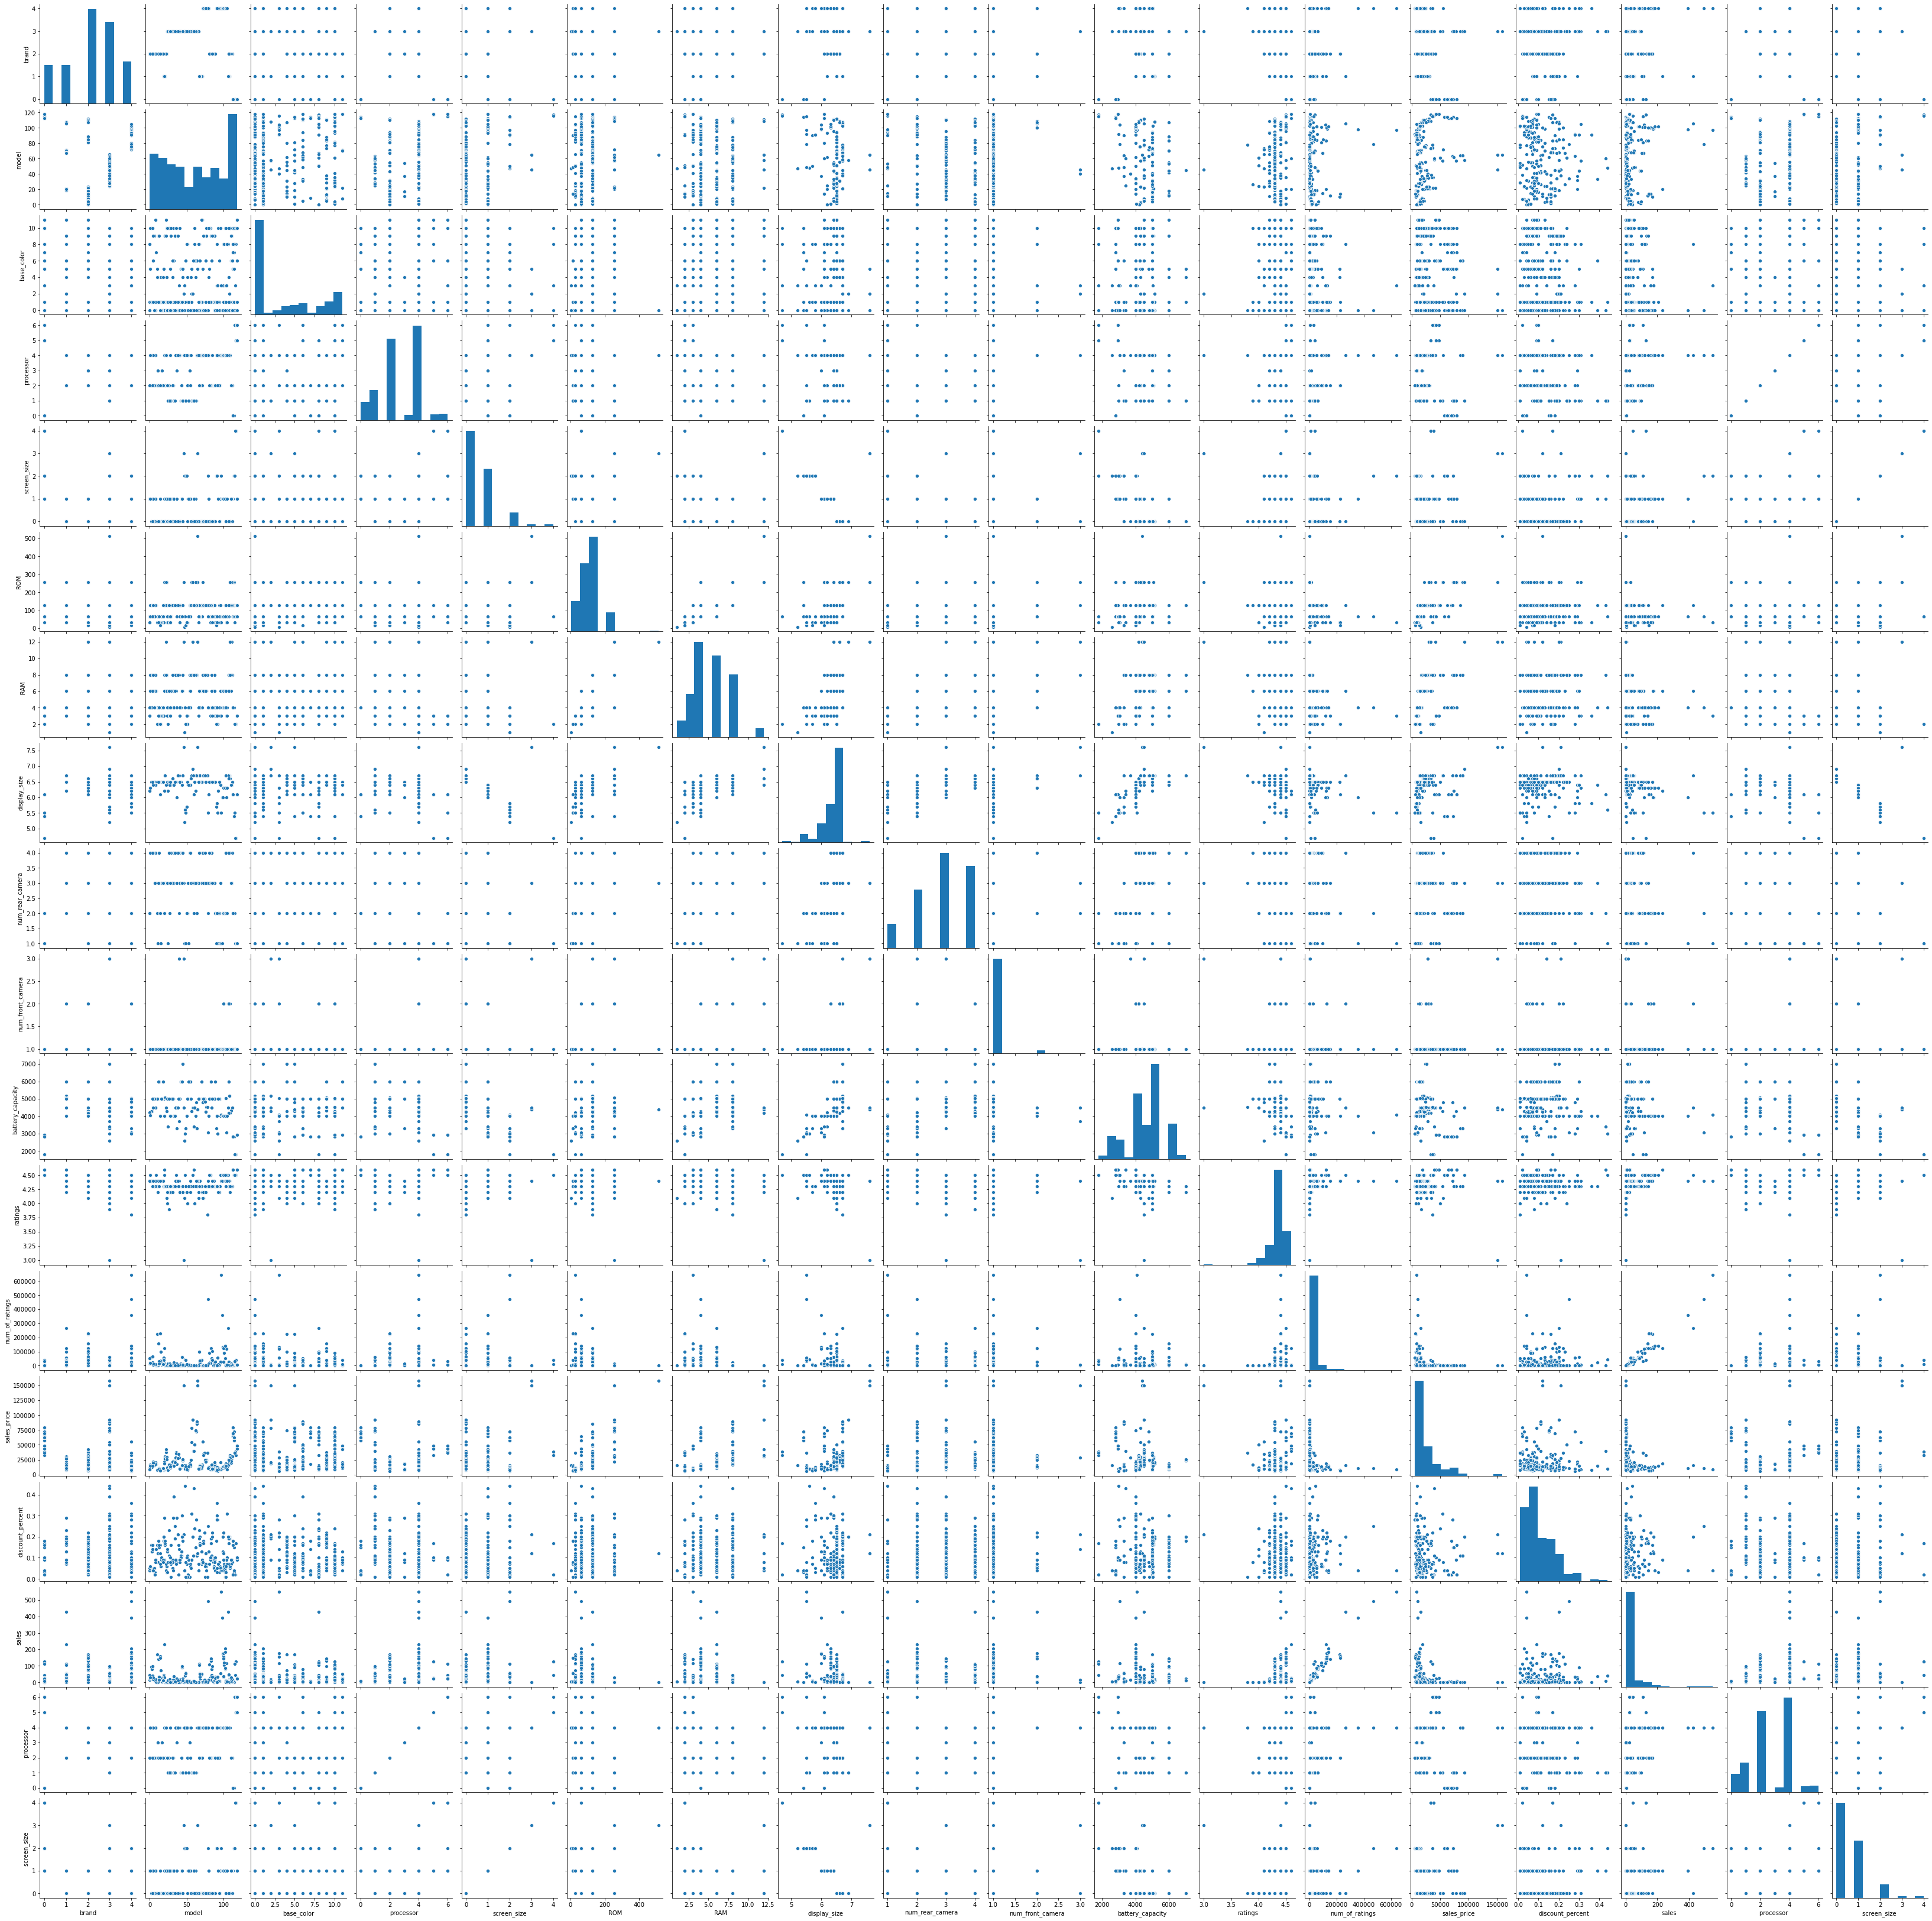

In [23]:
sns.pairplot(mydata)

#### Outlier Detection:

In [40]:

mydata_new_col = ['brand','model','base_color','processor','screen_size',	'ROM','RAM'	,'display_size','num_rear_camera','num_front_camera','battery_capacity','ratings','num_of_ratings','sales_price','discount_percent','sales']

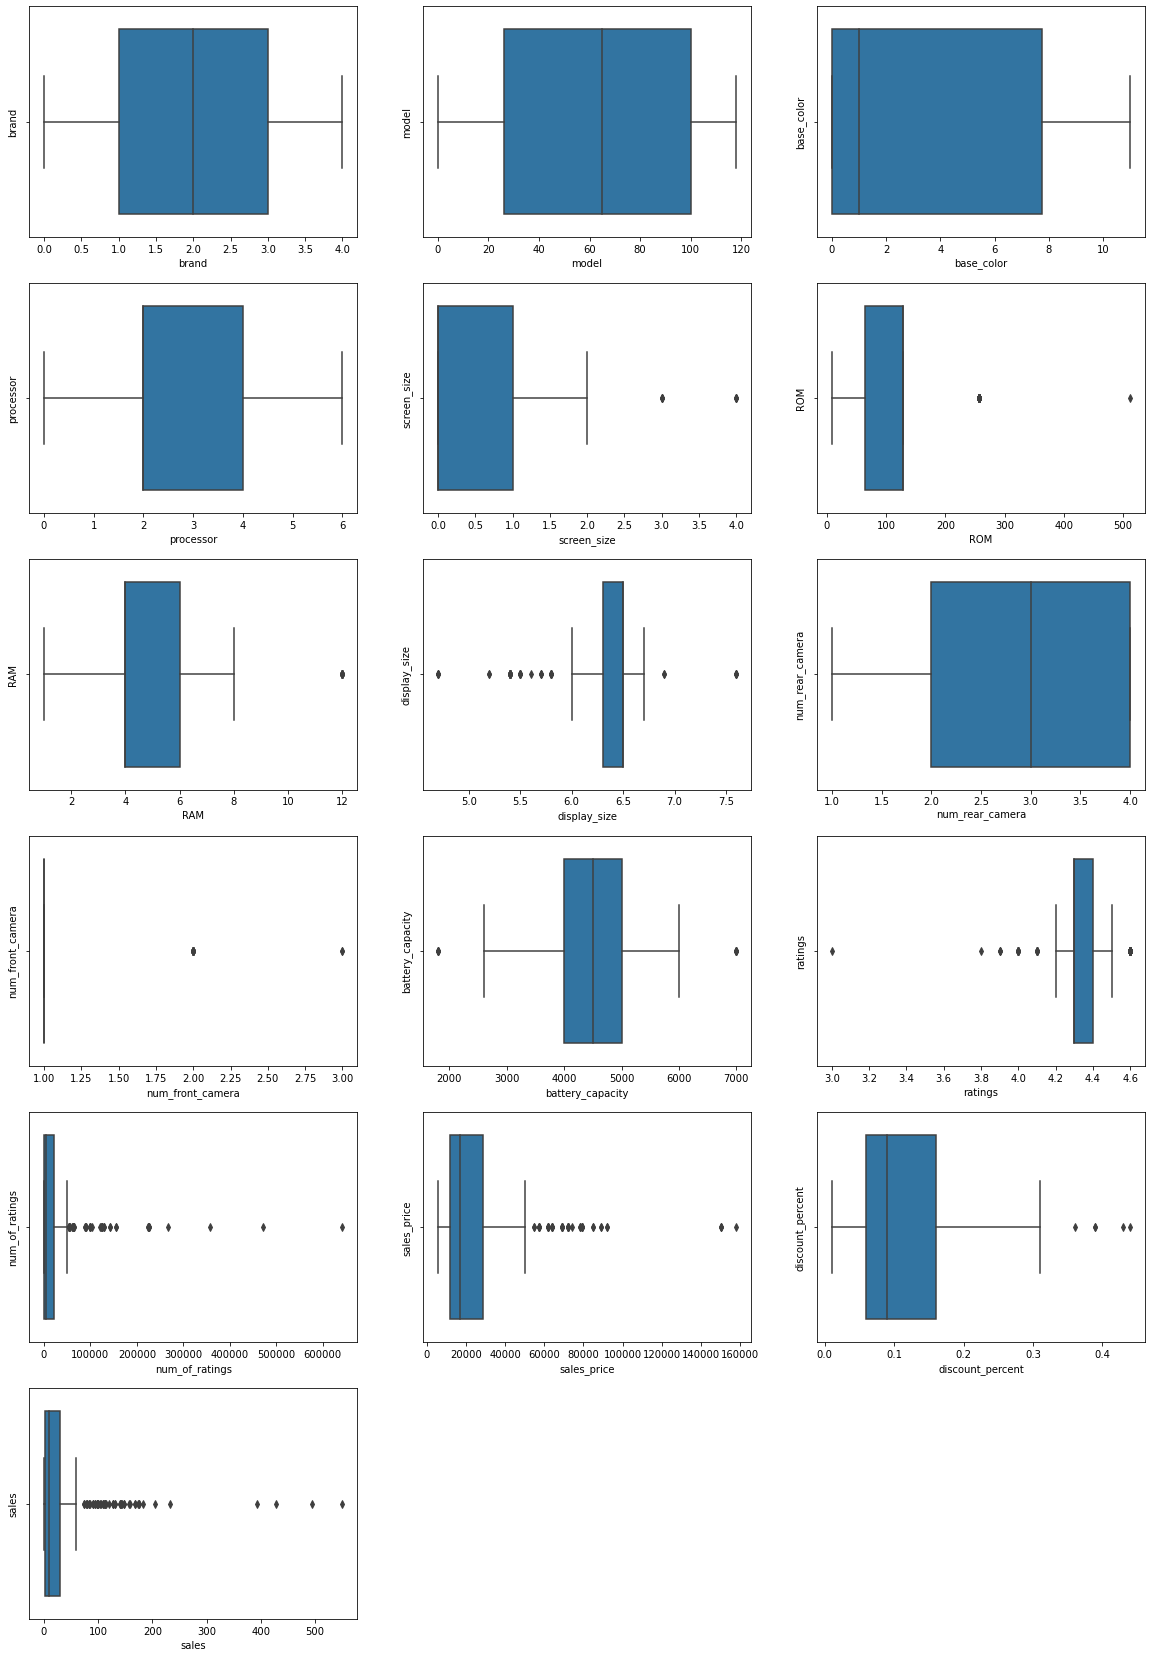

In [42]:
plt.figure(figsize=(20,50))
for i,col in enumerate(mydata_new,1):
    plt.subplot(10,3,i)
    sns.boxplot(mydata_new[col])
    plt.ylabel(col)
plt.show()

#### Independent and dependent variable:

In [47]:
x_ind = mydata_new.drop('sales',axis = 1)
y_dep = mydata_new['sales']

In [49]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()

In [55]:
import statsmodels.api as sm 
model = sm.OLS(y_dep,x_ind)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              425.3
Date:                Fri, 15 Oct 2021   Prob (F-statistic):                   5.30e-241
Time:                        19:27:15   Log-Likelihood:                         -1807.2
No. Observations:                 430   AIC:                                      3644.
Df Residuals:                     415   BIC:                                      3705.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
brand               -1.5573      0.839     -1.857      0.064      -3.206       0.091
model                0.0802      0.026      3.127      0.002       0.030       0.131
base_color           0.0590      0.213      0.277      0.782      -0.360       0.478
processor            2.7544      0.635      4.334      0.000       1.505       4.004
screen_size          2.6346      1.715      1.536      0.125      -0.736       6.006
ROM                  0.0022      0.022      0.101      0.920      -0.041       0.045
RAM                  1.0184      0.640      1.591      0.112      -0.240       2.277
display_size       -10.8671      4.320     -2.515      0.012     -19.360      -2.375
num_rear_camera      2.6995      1.290      2.092      0.037       0.163       5.236
num_front_camera     5.9243      3.862      1.534      0.126      -1.667      13.516
battery_capacity     0.0005      0.002      0.329      0.742      -0.003       0.004
ratings              9.5905      4.706      2.038      0.042       0.339      18.842
num_of_ratings       0.0010   1.56e-05     62.486      0.000       0.001       0.001
sales_price      -9.298e-05   7.34e-05     -1.266      0.206      -0.000    5.13e-05
discount_percent    36.8408     11.259      3.272      0.001      14.710      58.972
==============================================================================
Omnibus:                      230.537   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8222.257
Skew:                           1.635   Prob(JB):                         0.00
Kurtosis:                      24.171   Cond. No.                     8.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

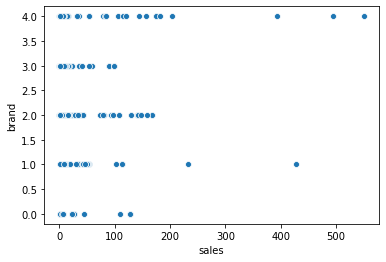

In [57]:
sns.scatterplot(x = 'sales',y = 'brand', data = mydata_new )

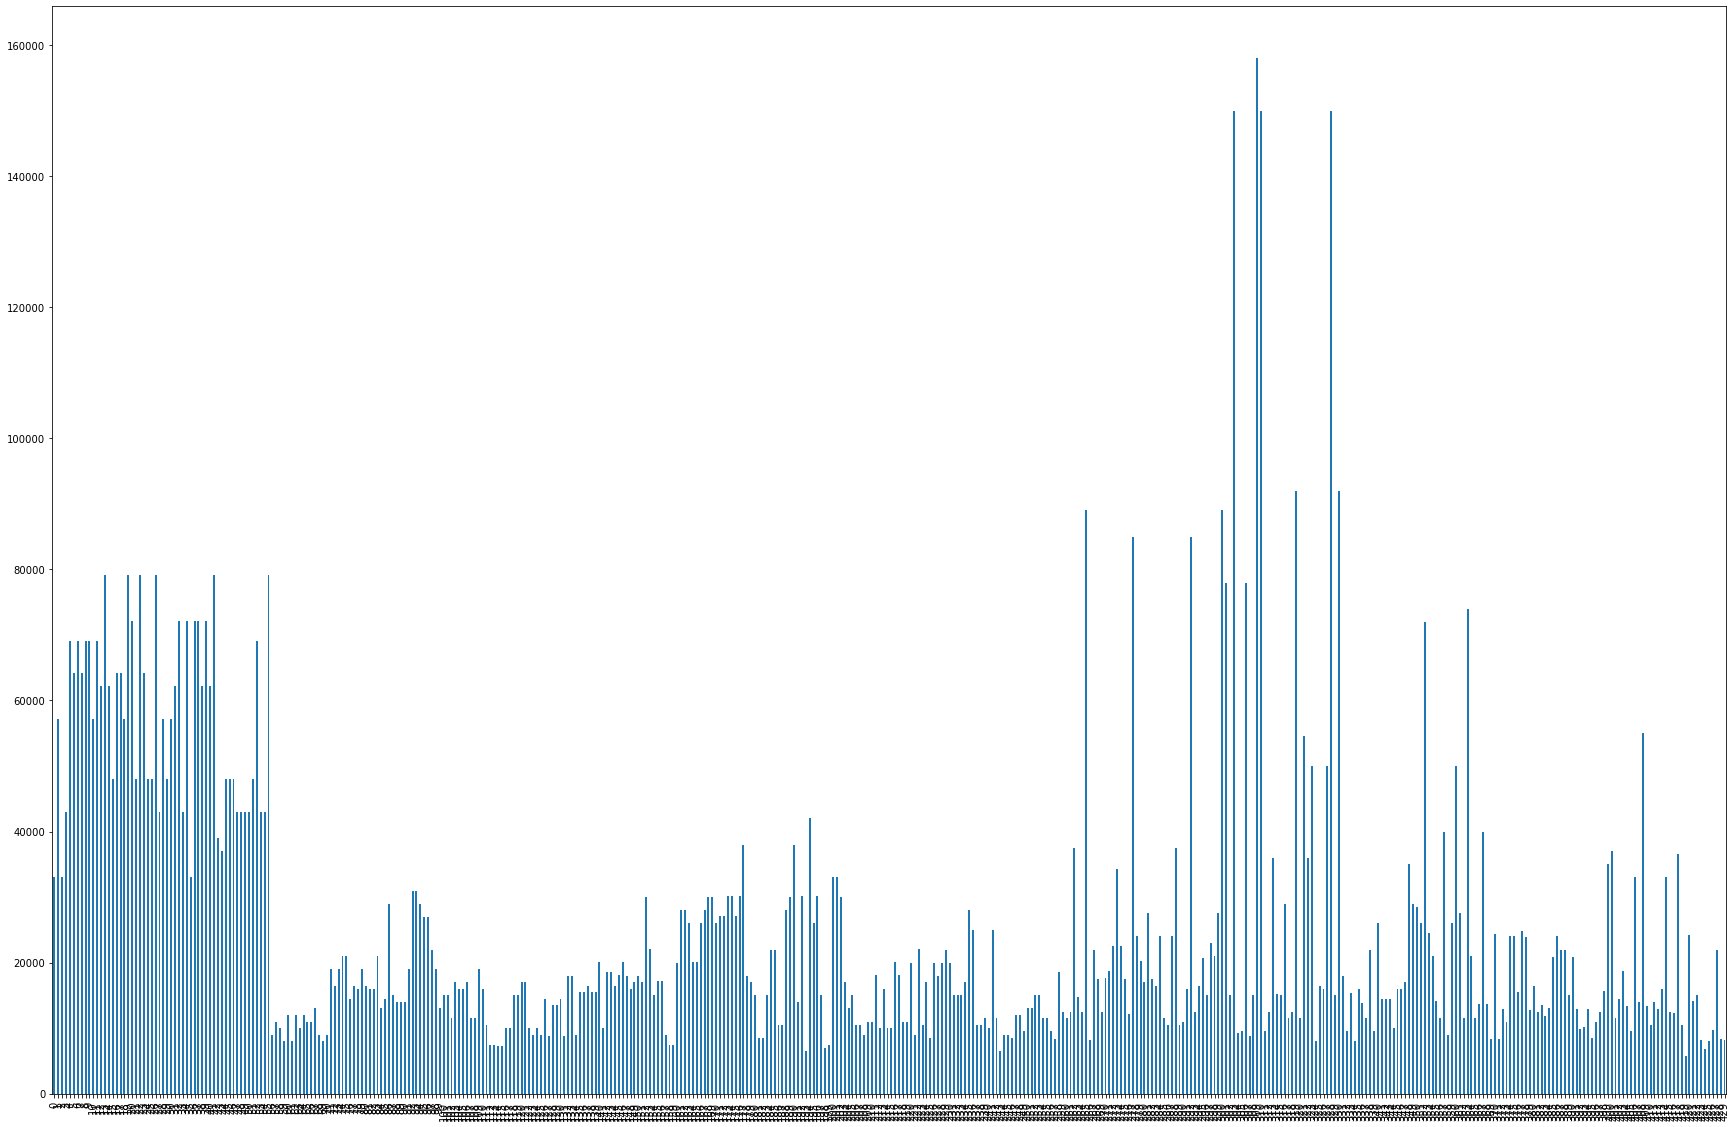

In [64]:
plt.figure(figsize = (30,20))
mydata['sales_price'].plot(kind = 'bar')

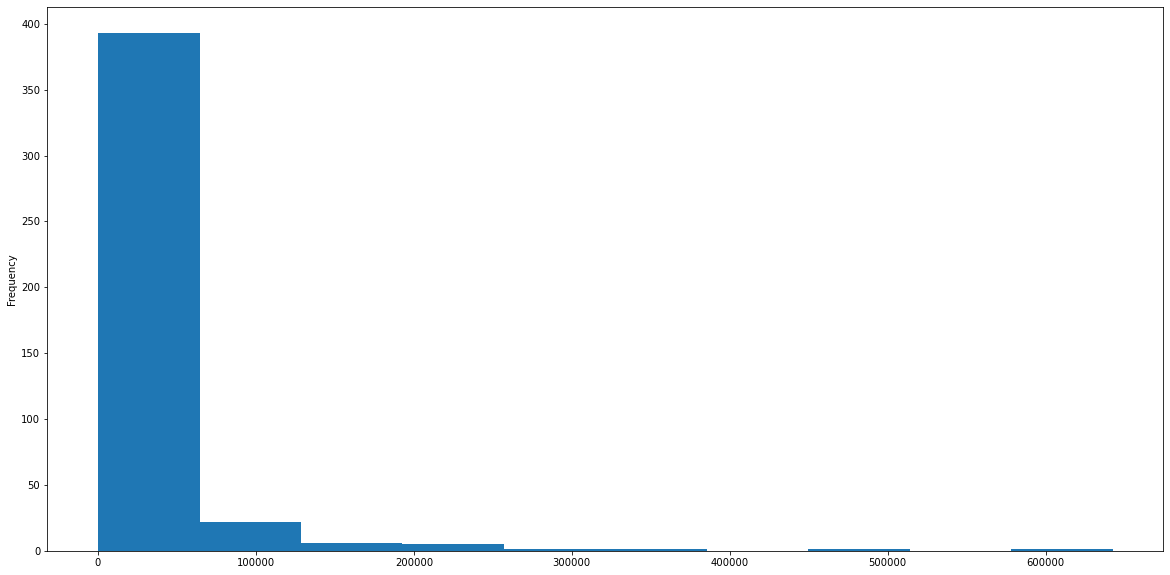

In [67]:
plt.figure(figsize = (20,10))
mydata['num_of_ratings'].plot(kind = 'hist')

#### Model selection:

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_ind,y_dep,train_size = 0.8, random_state = 1)

In [85]:
x_train=norm.fit_transform(x_train)
x_test=norm.fit_transform(x_test)

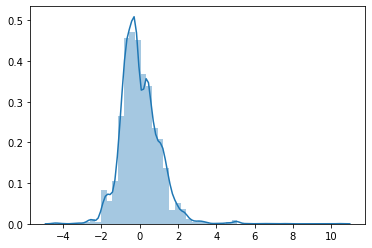

In [86]:
sns.distplot(x_train)

#### Model Building:

In [87]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model.fit(x_train,y_train)

SGDRegressor()

In [88]:
y_pred = model.predict(x_test)
y_pred

array([ 2.72662747e+01,  3.43456668e+01,  8.06089608e+00, -1.06332065e+01,
        5.94751945e+01,  1.19214971e+01, -1.38701687e+01, -1.69310394e+00,
        1.73269987e+02,  2.61732896e+01,  6.30452539e+01,  8.93775025e+01,
       -2.75738643e+00,  1.16609496e+01,  2.66492009e+01,  1.48759773e+01,
        9.18682372e+00,  7.52893527e+00, -2.98216800e+00,  2.59406181e+01,
       -8.98381341e-01,  1.90184993e+02,  4.08898602e-02,  2.25526529e-01,
        1.35401749e+01,  6.23821395e+01,  2.38778191e+01,  1.75902929e+02,
       -9.74255141e+00,  2.17340063e+00, -5.04875102e-01, -1.10768419e+01,
        1.28964816e+02,  1.92887907e+01,  1.16010556e+01,  6.12503701e+01,
        6.14843771e+00,  1.43180044e+02,  7.72166688e+00, -9.28205246e+00,
        2.27720787e+00,  2.01050720e+02,  1.52632914e+00,  5.73950611e+01,
       -3.20067987e+00,  2.12159445e+00, -1.45130093e+01, -8.37851820e+00,
       -9.08804811e-01, -1.52070543e+01, -3.55237588e+00,  1.03856030e+01,
       -1.50708837e+01,  

#### Accuracy score:

In [89]:
model.score(x_test,y_test)

0.7689407780133252

##### Comparing predicted and actual values:

In [93]:
residual  = pd.DataFrame({'predicted':y_pred,'Actual':y_test})
residual.head()

,predicted,Actual
227,27.266275,39.00
208,34.345667,25.91
164,8.060896,11.05
277,-10.633207,0.07
62,59.475195,47.85


##### Residual

In [94]:
Res=y_pred-y_test# we ll get residual by subtracting the predicted value by actual value. it ll give the error.
Res.head()

227   -11.733725
208     8.435667
164    -2.989104
277   -10.703207
62     11.625195
Name: sales, dtype: float64

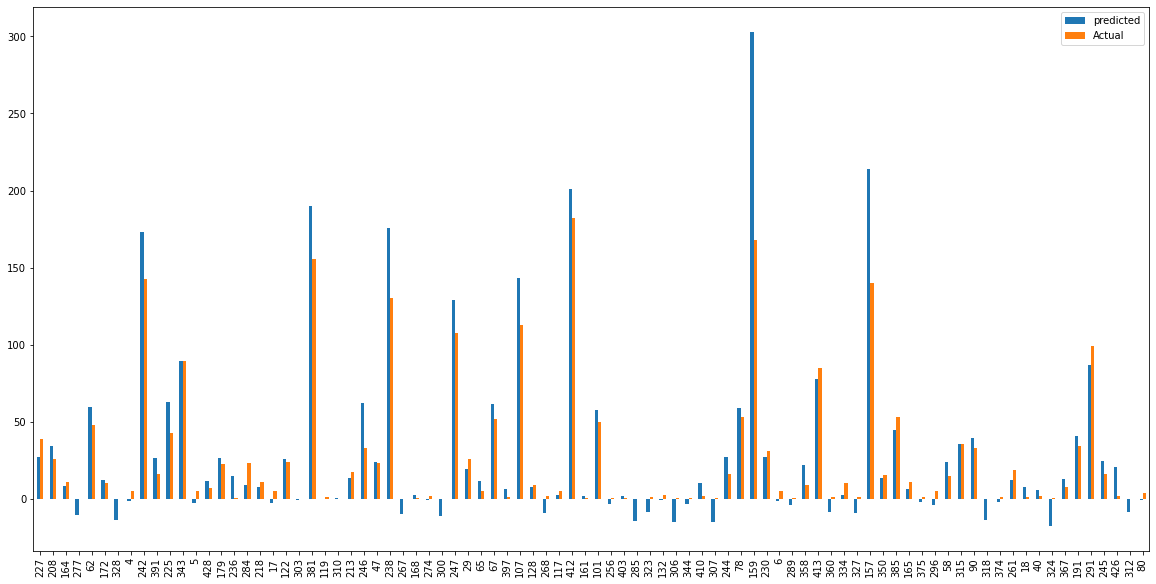

In [96]:
residual.plot(kind="bar",figsize=(20,10))

#### Mean sqaure error:

In [98]:
from sklearn.metrics import mean_squared_error
Error = mean_squared_error(y_test,y_pred)
Error

422.5230324234173

# Conclusion:
   Thus the machine predicted and actual value almost equal.The model predicted using linear regression helps to predict the upcoming new mobile in flipkart.The sales predicted by the model is 76% accurate.